In [1]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

In [2]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^5$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [3]:
data=np.exp(random.randn(100_000))

__In the below code box, plot a histogram of the array `data` as one figure and a histogram of the log of the data as a second figure.  Use 100 bins for each plot. Note:__ if you precede each plotting command by  `plt.figure()` it will make the plot on a separate set of axes, even if the code is in the same cell...

Text(0, 0.5, 'Frequency')

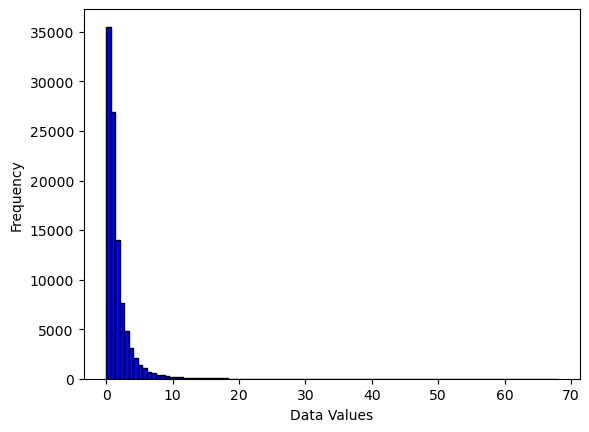

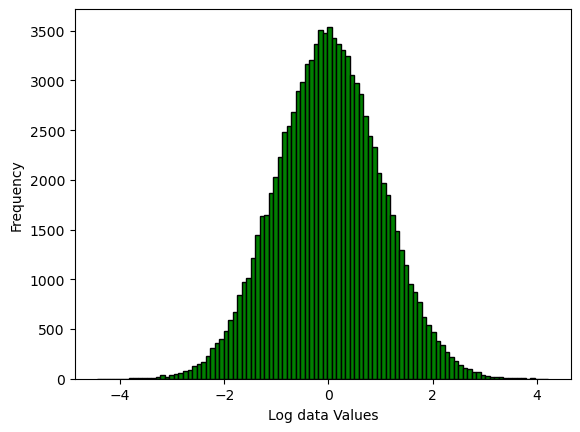

In [20]:
plt.figure()  
plt.hist(data, bins=100, color='b', edgecolor='black')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.figure()  
plt.hist(np.log(data), bins=100,color='g', edgecolor='black')
plt.xlabel('Log data Values')
plt.ylabel('Frequency')



Calculating the mean:

In [21]:
print(np.mean(data))
print( data.mean() )

1.6490491924717432
1.6490491924717432


Calculating the median:

In [12]:
print(np.median(data))

0.9992105920802419


Calculating the mode:

In [13]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data,decimals=2)
print(f'Rounded: {stats.mode(data_r)}' )

Unrounded: ModeResult(mode=np.float64(0.011825793025400294), count=np.int64(1))
Rounded: ModeResult(mode=np.float64(0.32), count=np.int64(694))


In [14]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.32000000000000006


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [15]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range).
# as those are unlikely to be what you want
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

In [23]:

mode_1=mode2(data,bins=5)
mode_2=mode2(data,bins=10)
mode_3=mode2(data,bins=15)
print(mode_1,mode_2,mode_3)

6.800457106016789 3.4061414495210944 2.274702897355863


?

# Calculating measures of scale

First, the standard deviation:


In [29]:
print( np.std(data),np.std(data,ddof=1) )
print(np.std(np.log(data)),np.std(np.log(data),ddof=1) )

2.1468166415769234 2.1468273757406378
1.0005600905757595 1.0005650934137338


### Now, the average absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation for the log-normal or normally-distributed data?__


In [30]:
normavgabsdev = np.mean(np.abs(data-data.mean()))/0.7979
mnlog = np.mean(np.log(data) )
normavgabsdev_log = np.mean(np.abs( np.log(data)-mnlog) )/0.7979

print(f'Normalized Average Absolute Deviation: {normavgabsdev:.5f}')
print(f'Normalized Average Absolute Deviation of log(data): {normavgabsdev_log:.5f}')

Normalized Average Absolute Deviation: 1.58494
Normalized Average Absolute Deviation of log(data): 1.00052


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [32]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745
normmad_scipy = stats.median_abs_deviation(data,scale='normal')

print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Scipy Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Median Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.88826
Scipy Normalized Median Absolute Deviation: 0.88826
Normalized Median Absolute Deviation of log(data): 0.99989


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [33]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 1.07541
Normalized IQR of log(data): 0.99968


# Results when averaging data together

In [50]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

0.100119165120053 0.3329645689411956


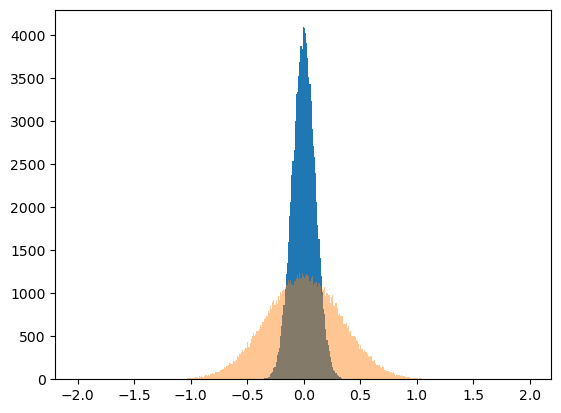

In [57]:
plt.hist(means,bins=np.arange(-2,2,0.01))
nsims=int(1E5)
navg_2=9
data_2=random.randn(nsims,navg_2)
# average each set of navg values
means_2=np.mean(data_2,axis=1)
plt.hist(means_2,bins=np.arange(-2,2,0.01),alpha=0.45)
print(np.std(means),np.std(means_2))

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 4.000e+0

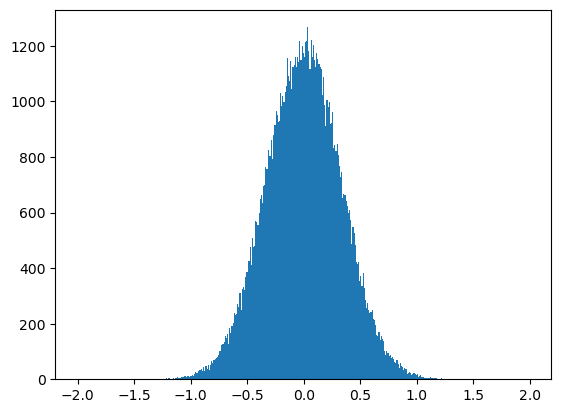

In [37]:
nsims=int(1E5)
navg=9
data=random.randn(nsims,navg)
# average each set of navg values
means=np.mean(data,axis=1)
plt.hist(means,bins=np.arange(-2,2,0.01))

# If you have extra time

- Try a wide variety of binnings and explore how the mode of our lognormal data changes as the bin size does.

- Create a dataset that is drawn from two different distributions:
    - 90% of the time draw from a standard normal ($N(0,1)$)
    - 10% of the time draw a value from a different distribution: $\exp(N(0,1)$)

    Calculate all of our measures of location and scale for this mixed dataset.  Which (if any) give you the expected values for a standard normal distribution?


(array([0., 0., 0., ..., 0., 0., 0.], shape=(1199,)),
 array([-6.  , -5.99, -5.98, ...,  5.97,  5.98,  5.99], shape=(1200,)),
 <BarContainer object of 1199 artists>)

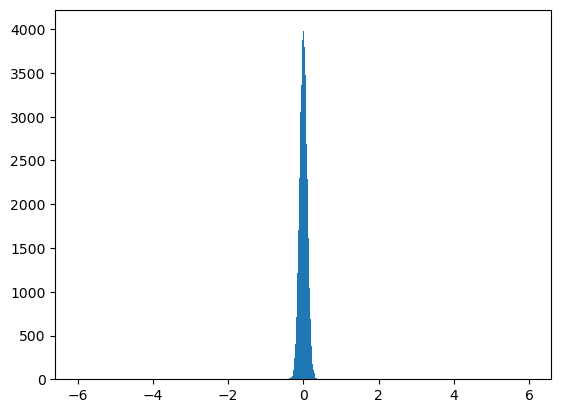

In [44]:
plt.hist(means,bins=np.arange(-6,6,0.01))